In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

today = datetime.date.today()

api_link = "https://data.elexon.co.uk/bmrs/api/v1/generation/outturn/summary?startTime="+str(today.year-1)+"-"+str(today.month)+"-"+str(today.day)+"&includeNegativeGeneration=true&format=json"

df = pd.read_json(api_link)

In [2]:
print(df.shape)
df.head()

(367, 3)


,startTime,settlementPeriod,data
0,2023-11-13T00:00:00Z,1,"[{'fuelType': 'BIOMASS', 'generation': 2788}, ..."
1,2023-11-14T00:00:00Z,1,"[{'fuelType': 'BIOMASS', 'generation': 2357}, ..."
2,2023-11-15T00:00:00Z,1,"[{'fuelType': 'BIOMASS', 'generation': 2861}, ..."
3,2023-11-16T00:00:00Z,1,"[{'fuelType': 'BIOMASS', 'generation': 3023}, ..."
4,2023-11-17T00:00:00Z,1,"[{'fuelType': 'BIOMASS', 'generation': 2783}, ..."


In [3]:
df["data"][1]

[{'fuelType': 'BIOMASS', 'generation': 2357},
 {'fuelType': 'CCGT', 'generation': 9517},
 {'fuelType': 'COAL', 'generation': 447},
 {'fuelType': 'INTELEC', 'generation': 50},
 {'fuelType': 'INTEW', 'generation': -128},
 {'fuelType': 'INTFR', 'generation': 984},
 {'fuelType': 'INTIFA2', 'generation': 882},
 {'fuelType': 'INTIRL', 'generation': -321},
 {'fuelType': 'INTNED', 'generation': 577},
 {'fuelType': 'INTNEM', 'generation': 729},
 {'fuelType': 'INTNSL', 'generation': 715},
 {'fuelType': 'NPSHYD', 'generation': 397},
 {'fuelType': 'NUCLEAR', 'generation': 3527},
 {'fuelType': 'OCGT', 'generation': 4},
 {'fuelType': 'OIL', 'generation': 0},
 {'fuelType': 'OTHER', 'generation': 261},
 {'fuelType': 'PS', 'generation': -16},
 {'fuelType': 'WIND', 'generation': 9471}]

In [4]:
pd.json_normalize(df["data"][365]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
fuelType,BIOMASS,CCGT,COAL,INTELEC,INTEW,INTFR,INTGRNL,INTIFA2,INTIRL,INTNED,INTNEM,INTNSL,INTVKL,NPSHYD,NUCLEAR,OCGT,OIL,OTHER,PS,WIND
generation,2612,15115,0,0,-480,1967,0,483,-445,-279,437,1398,-794,196,4737,39,0,490,-85,6747


In [5]:
row = pd.json_normalize(df["data"][1]).T
row.reset_index(inplace=True)
row.pop("index")
row.columns = row.iloc[0]
row.drop(0, inplace=True)
row.reset_index()
row

,BIOMASS,CCGT,COAL,INTELEC,INTEW,INTFR,INTIFA2,INTIRL,INTNED,INTNEM,INTNSL,NPSHYD,NUCLEAR,OCGT,OIL,OTHER,PS,WIND
1,2357,9517,447,50,-128,984,882,-321,577,729,715,397,3527,4,0,261,-16,9471


In [6]:
columns =  pd.json_normalize(df["data"][365]).T.iloc[0].values
new_df = pd.DataFrame(columns=columns)
new_df


,BIOMASS,CCGT,COAL,INTELEC,INTEW,INTFR,INTGRNL,INTIFA2,INTIRL,INTNED,INTNEM,INTNSL,INTVKL,NPSHYD,NUCLEAR,OCGT,OIL,OTHER,PS,WIND


In [23]:
## Unpacking the json format into different columns 
for i in range(len(df)):
    row = pd.json_normalize(df["data"][i]).T
    row.reset_index(inplace=True)
    row.pop("index")
    row.columns = row.iloc[0]
    row.drop(0, inplace=True)
    new_df.loc[len(new_df)] = row.iloc[0]

new_df.fillna(0, inplace=True)
new_df.head()

,BIOMASS,CCGT,COAL,INTELEC,INTEW,INTFR,INTGRNL,INTIFA2,INTIRL,INTNED,...,INTNSL,INTVKL,NPSHYD,NUCLEAR,OCGT,OIL,OTHER,PS,WIND,INT
0,2788,5869,353,35,-158,825,0.0,948,-113,-33,...,695,0.0,373,3679,4,0,234,-322,13262,2645.0
1,2357,9517,447,50,-128,984,0.0,882,-321,577,...,715,0.0,397,3527,4,0,261,-16,9471,3488.0
2,2861,11972,839,789,-320,607,0.0,-2,-317,-132,...,-106,0.0,523,3493,22,0,310,-139,9797,763.0
3,3023,18943,1412,951,-240,960,0.0,-2,-206,599,...,1237,0.0,587,3052,147,0,515,143,1270,4071.0
4,2783,18337,1369,705,-92,598,0.0,-2,-158,134,...,1065,0.0,558,3055,24,0,459,27,2153,2700.0


In [24]:
## Combining all the interconnections into 1 column
inters = columns[3:13]
new_df["INT"] = [new_df.iloc[i].values[3:13].sum() for i in range(len(new_df))]
new_df.head()

,BIOMASS,CCGT,COAL,INTELEC,INTEW,INTFR,INTGRNL,INTIFA2,INTIRL,INTNED,...,INTNSL,INTVKL,NPSHYD,NUCLEAR,OCGT,OIL,OTHER,PS,WIND,INT
0,2788,5869,353,35,-158,825,0.0,948,-113,-33,...,695,0.0,373,3679,4,0,234,-322,13262,2645.0
1,2357,9517,447,50,-128,984,0.0,882,-321,577,...,715,0.0,397,3527,4,0,261,-16,9471,3488.0
2,2861,11972,839,789,-320,607,0.0,-2,-317,-132,...,-106,0.0,523,3493,22,0,310,-139,9797,763.0
3,3023,18943,1412,951,-240,960,0.0,-2,-206,599,...,1237,0.0,587,3052,147,0,515,143,1270,4071.0
4,2783,18337,1369,705,-92,598,0.0,-2,-158,134,...,1065,0.0,558,3055,24,0,459,27,2153,2700.0


In [29]:
# putting all interconnectors in own dataframe and dropping them from new_df#

int_df = new_df[inters]
new_df.drop(inters, axis=1, inplace=True)
int_df.head()

,INTELEC,INTEW,INTFR,INTGRNL,INTIFA2,INTIRL,INTNED,INTNEM,INTNSL,INTVKL
0,35,-158,825,0.0,948,-113,-33,446,695,0.0
1,50,-128,984,0.0,882,-321,577,729,715,0.0
2,789,-320,607,0.0,-2,-317,-132,244,-106,0.0
3,951,-240,960,0.0,-2,-206,599,772,1237,0.0
4,705,-92,598,0.0,-2,-158,134,450,1065,0.0


In [30]:
new_df.to_csv("./data.csv")
int_df.to_csv("./int_data.csv")

In [8]:
columns = new_df.columns
inters = columns[3:13]


gen_summed = new_df[columns].sum().values
all_inters_summed = new_df[inters].sum().values.sum()
all_inters_summed

np.int64(1355766)

<BarContainer object of 11 artists>

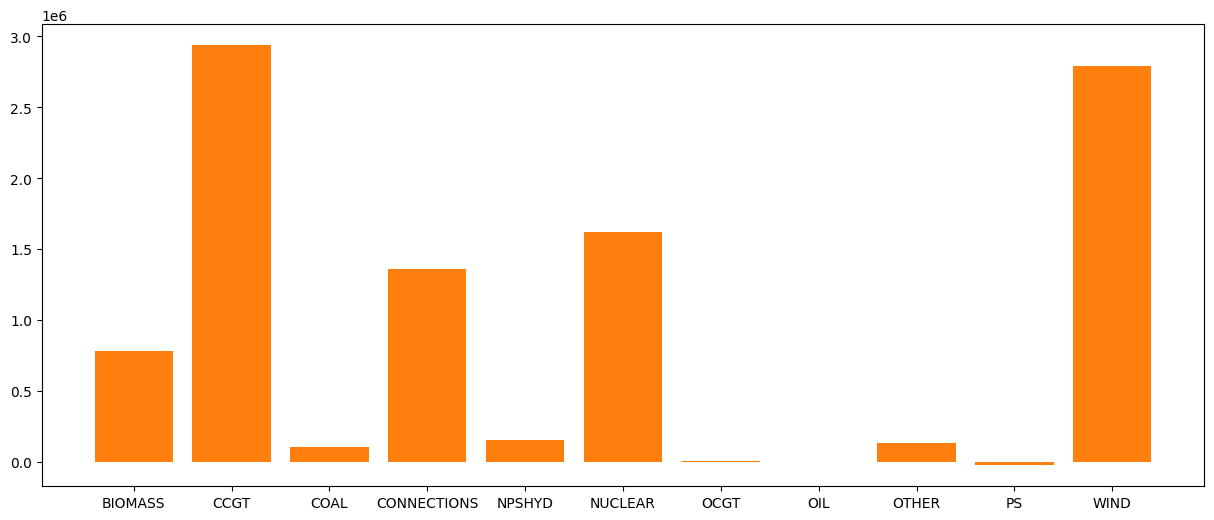

In [9]:
gen_summed = new_df[columns].sum().values


fig, ax = plt.subplots(figsize=(15,6))

columns_inters_joined = list(columns[:3]) + ["CONNECTIONS"] + list(columns[13:])
gen_summed_inters_joined = list(gen_summed[:3]) + [int(all_inters_summed)] + list(gen_summed[13:])

ax.bar(
    x = columns_inters_joined,
    height = gen_summed_inters_joined,
)

ax.bar(
    x = columns_inters_joined,
    height = gen_summed_inters_joined,
)

In [25]:
df_inters = new_df.copy()
df_inters["INTERS"] = df_inters[inters].sum(axis=1)
df_inters.drop(inters, axis=1, inplace=True)
df_inters.head()

,BIOMASS,CCGT,COAL,NPSHYD,NUCLEAR,OCGT,OIL,OTHER,PS,WIND,INTERS
0,1538,4061,326,428,4707,14,0,315,-284,12857,4558
1,1292,6327,144,489,4708,14,0,259,5,11662,4662
2,1966,6331,335,472,4694,1,0,320,-82,11400,2973
3,937,8247,877,482,4383,0,0,318,-68,6508,6313
4,796,7733,772,456,4249,15,0,328,-121,6243,5894


In [ ]:
df_inters.values

array([[1538, 4061, 326, ..., -284, 12857, 4558],
       [1292, 6327, 144, ..., 5, 11662, 4662],
       [1966, 6331, 335, ..., -82, 11400, 2973],
       ...,
       [2865, 15342, 0, ..., 179, 2357, 4198],
       [2817, 10225, 0, ..., -128, 6915, 4165],
       [2259, 12625, 0, ..., -198, 4586, 5197]], dtype=object)

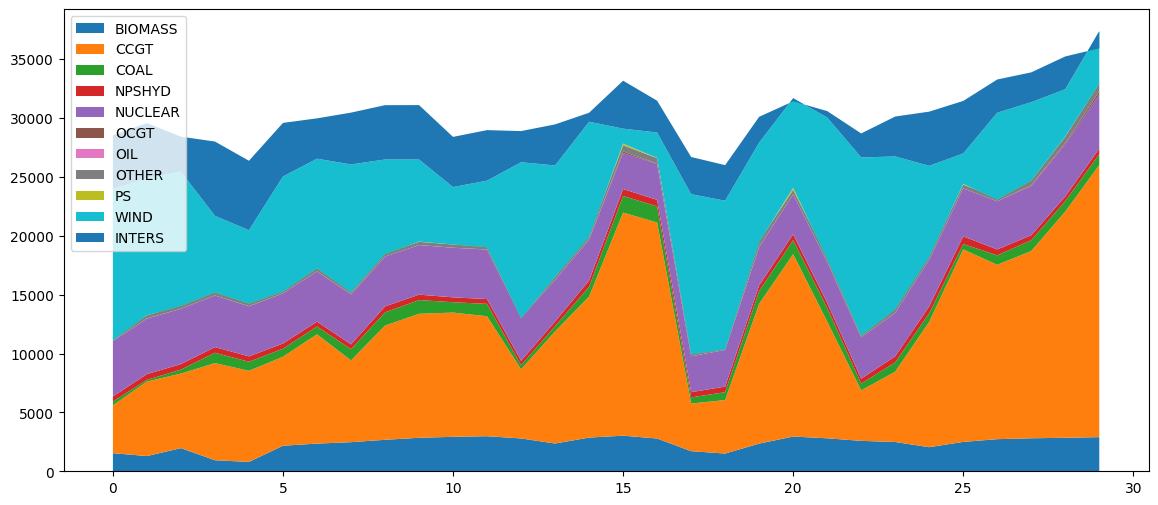

In [64]:
length = 30 # len(df_inters)

fig, ax = plt.subplots(figsize=(14,6))

ax.stackplot(range(length), df_inters.values.astype(float)[:length].T, labels = list(df_inters.columns))
ax.legend(loc='upper left')


plt.show()

dict_values([[1, 2, 3]])